__Imports__

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

__Data Visualization__

In [40]:
data = pd.read_csv('Pearson.csv')
data.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


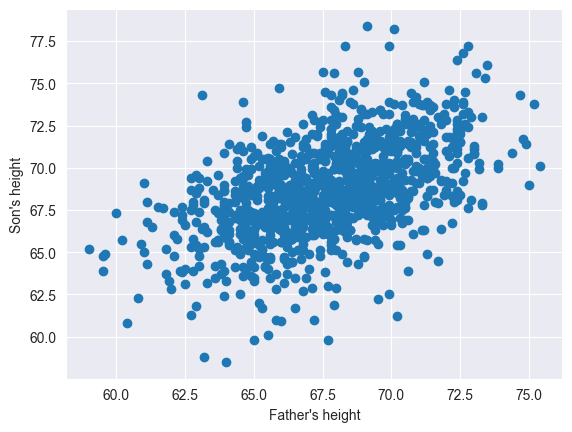

In [41]:
plt.scatter(data.Father, data.Son)
plt.xlabel("Father's height")
plt.ylabel("Son's height")
plt.show()

__MSE__

In [42]:
def MSE(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].Father
        y = points.iloc[i].Son
        total_error += (y - (m * x + b)) ** 2
    total_error = total_error / float(len(points))

__Gradient Descent__

In [43]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].Father
        y = points.iloc[i].Son

        m_gradient += -2/n * x * (y - m_now * x + b_now)
        b_gradient += -2/n * (y - m_now * x + b_now)

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

__Training__

In [48]:
m = 0
b = 0
L = 0.0001
epochs = 1000

for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
    m, b = gradient_descent(m, b, data, L)

print(m, b)

Epoch: 0
Epoch: 50
1.014150509498873 0.01607154329141755


__Visualizing results__

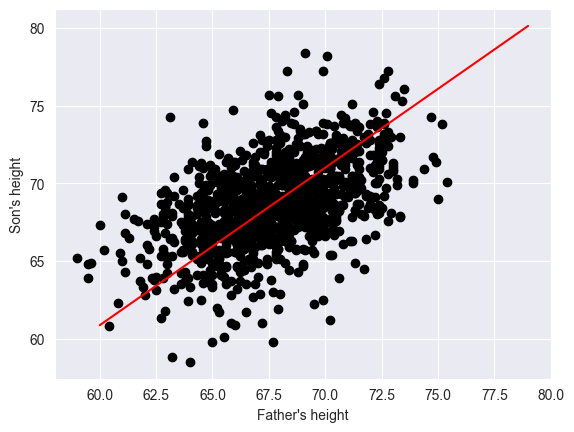

In [49]:
plt.scatter(data.Father, data.Son, color='black')
plt.xlabel('Father\'s height')
plt.ylabel('Son\'s height')
plt.plot(list(range(60,80)), [m * x + b for x in range(60, 80)], color='red')
plt.show()